In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('spotify_history.csv')

In [3]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [5]:
df.dtypes

spotify_track_uri    object
ts                   object
platform             object
ms_played             int64
track_name           object
artist_name          object
album_name           object
reason_start         object
reason_end           object
shuffle                bool
skipped                bool
dtype: object

In [6]:
# Convert timestamp column to datetime format
df['ts'] = pd.to_datetime(df['ts'])

In [7]:
df.dtypes

spotify_track_uri            object
ts                   datetime64[ns]
platform                     object
ms_played                     int64
track_name                   object
artist_name                  object
album_name                   object
reason_start                 object
reason_end                   object
shuffle                        bool
skipped                        bool
dtype: object

In [8]:
# Extract date, hour, day of the week, and year for analysis
df['date'] = df['ts'].dt.date
df['hour'] = df['ts'].dt.hour
df['day_of_week'] = df['ts'].dt.day_name()
df['year'] = df['ts'].dt.year

In [9]:
# Create a "full track ID" for unique song identification
df['full_track_id'] = df['artist_name'] + " - " + df['track_name']

In [10]:
# Convert milliseconds played to seconds and minutes
df['seconds_played'] = df['ms_played'] / 1000
df['minutes_played'] = df['seconds_played'] / 60

In [11]:
# Define a "completed song" column (if played >80% of 3-minute song = 144000ms)
df['completed_song'] = df['ms_played'] > 144000

In [12]:
# Correcting the warning by using explicit assignment
df['reason_start'] = df['reason_start'].fillna('Unknown')
df['reason_end'] = df['reason_end'].fillna('Unknown')

# Verify that missing values are handled
df[['reason_start', 'reason_end']].isnull().sum()

reason_start    0
reason_end      0
dtype: int64

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 148675 entries, 0 to 149859
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   spotify_track_uri  148675 non-null  object        
 1   ts                 148675 non-null  datetime64[ns]
 2   platform           148675 non-null  object        
 3   ms_played          148675 non-null  int64         
 4   track_name         148675 non-null  object        
 5   artist_name        148675 non-null  object        
 6   album_name         148675 non-null  object        
 7   reason_start       148675 non-null  object        
 8   reason_end         148675 non-null  object        
 9   shuffle            148675 non-null  bool          
 10  skipped            148675 non-null  bool          
 11  date               148675 non-null  object        
 12  hour               148675 non-null  int32         
 13  day_of_week        148675 non-null  object       

(None,
         spotify_track_uri                  ts    platform  ms_played  \
 0  2J3n32GeLmMjwuAzyhcSNe 2013-07-08 02:44:34  web player       3185   
 1  1oHxIPqJyvAYHy0PVrDU98 2013-07-08 02:45:37  web player      61865   
 2  487OPlneJNni3NWC8SYqhW 2013-07-08 02:50:24  web player     285386   
 3  5IyblF777jLZj1vGHG2UD3 2013-07-08 02:52:40  web player     134022   
 4  0GgAAB0ZMllFhbNc3mAodO 2013-07-08 03:17:52  web player          0   
 
                                       track_name        artist_name  \
 0                            Say It, Just Say It       The Mowgli's   
 1  Drinking from the Bottle (feat. Tinie Tempah)      Calvin Harris   
 2                                    Born To Die       Lana Del Rey   
 3                               Off To The Races       Lana Del Rey   
 4                                      Half Mast  Empire Of The Sun   
 
                            album_name reason_start reason_end  shuffle  \
 0                Waiting For The Dawn     a

In [15]:
# Top 10 most played artists (based on total playtime)
top_artists = df.groupby('artist_name')['minutes_played'].sum().nlargest(10)
top_artists

artist_name
The Beatles           19987.780400
The Killers           17205.968283
John Mayer            11864.298717
Bob Dylan              9374.496433
Paul McCartney         5914.121717
Howard Shore           5813.573817
The Strokes            5150.653550
The Rolling Stones     5044.604917
Pink Floyd             4277.869700
Led Zeppelin           4104.651917
Name: minutes_played, dtype: float64

In [16]:
# Top 10 most played songs (based on total playtime)
top_songs = df.groupby('full_track_id')['minutes_played'].sum().nlargest(10)
top_songs

full_track_id
The Strokes - Ode To The Mets                                                                         1100.407200
Howard Shore - The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)     1073.361017
Howard Shore - The Fellowship Reunited (feat. Sir James Galway, Viggo Mortensen and Renée Fleming)     745.945500
Joaquín Sabina - 19 Dias y 500 Noches - En Directo                                                     706.250450
John Mayer - In the Blood                                                                              636.390350
Lennie Niehaus - Claudia's Theme - Version Eight                                                       618.681667
The Killers - Dying Breed                                                                              603.044217
Howard Shore - The Breaking of the Fellowship (feat. "In Dreams")                                      599.848300
Howard Shore - The Road Goes Ever On..., Pt. 1                            

In [17]:
# Top 10 most played albums (based on total playtime)
top_albums = df.groupby('album_name')['minutes_played'].sum().nlargest(10)
top_albums

album_name
The Beatles                                           3087.254050
The New Abnormal                                      2986.600283
Imploding The Mirage                                  2665.352550
Abbey Road                                            2467.634150
Blood On The Tracks                                   2412.837933
Past Masters                                          2410.200533
Hot Fuss                                              2336.767700
The Wall                                              2301.953733
Pressure Machine                                      1888.740067
Where the Light Is: John Mayer Live In Los Angeles    1864.902100
Name: minutes_played, dtype: float64

In [18]:
sns.set_style("darkgrid")

In [19]:
# Group by year and sum minutes played
yearly_trend = df.groupby('year')['minutes_played'].sum()

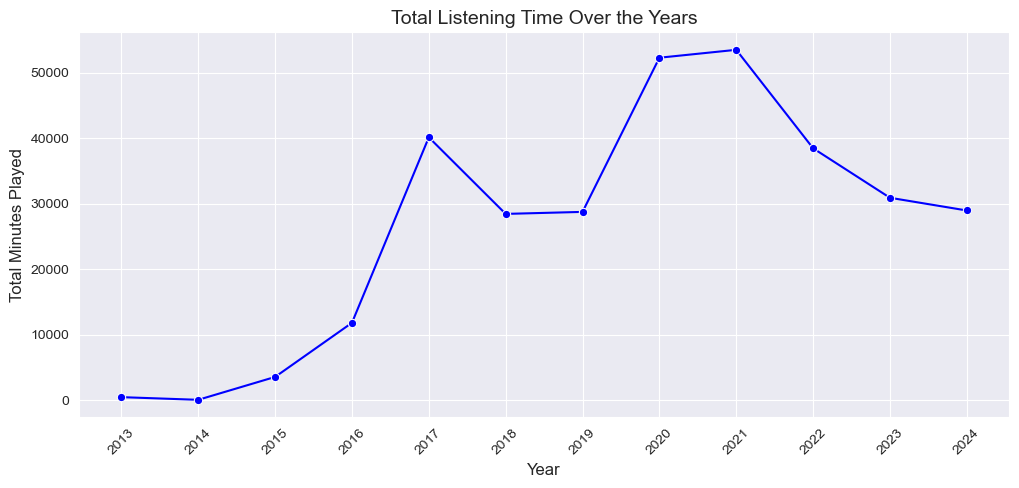

In [20]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o', color='b')
plt.title("Total Listening Time Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Minutes Played", fontsize=12)
plt.xticks(yearly_trend.index, rotation=45)
plt.show()

In [21]:
df['month'] = df['ts'].dt.strftime('%Y-%m')  # Year-Month format
monthly_trend = df.groupby('month')['minutes_played'].sum()

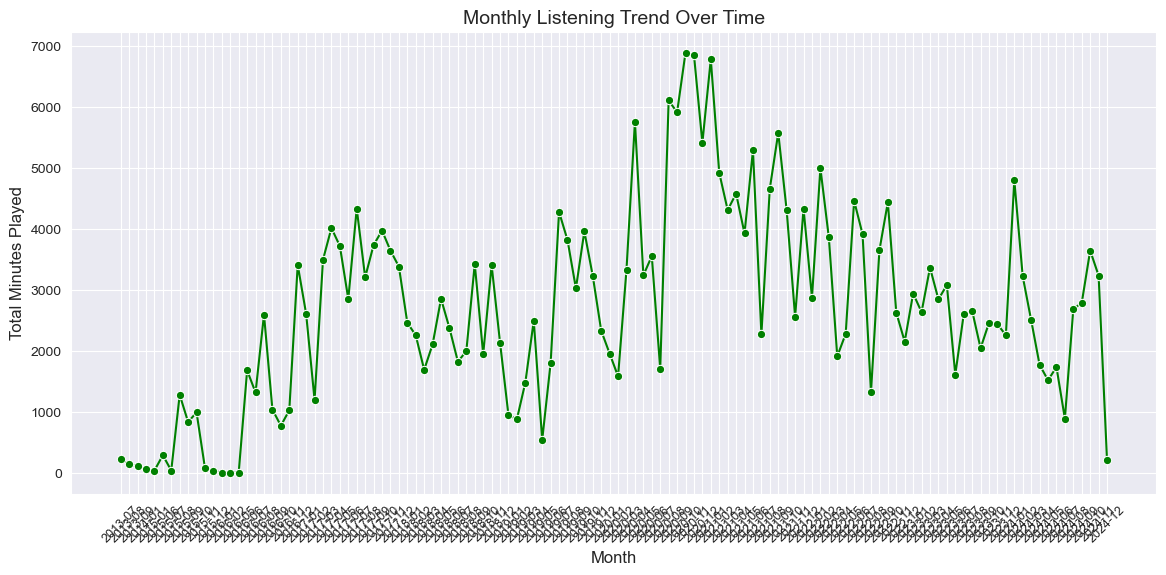

In [22]:
plt.figure(figsize=(14, 6))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o', color='g')
plt.title("Monthly Listening Trend Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Minutes Played", fontsize=12)
plt.xticks(rotation=45, fontsize=9)  # Rotate x-axis labels for readability
plt.show()

In [23]:
# Group by day of the week
day_trend = df.groupby('day_of_week')['minutes_played'].sum()
day_trend = day_trend.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

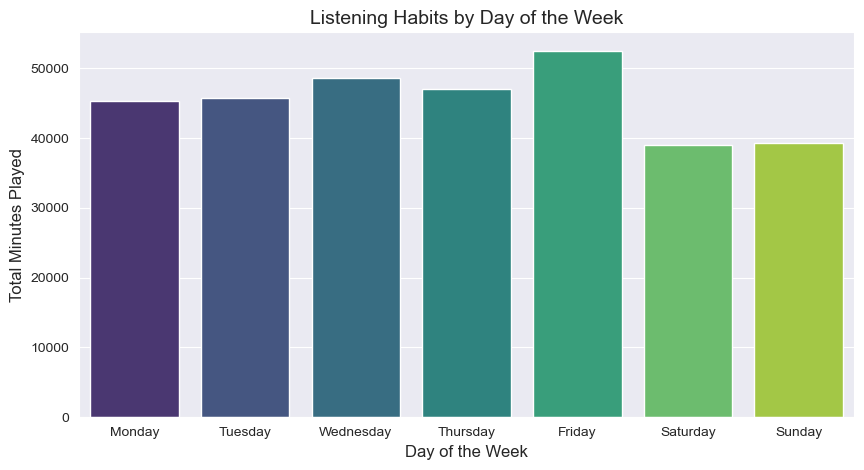

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(x=day_trend.index, y=day_trend.values, palette="viridis")
plt.title("Listening Habits by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Total Minutes Played", fontsize=12)
plt.show()

In [25]:
# Skip rate analysis: Percentage of times a song was skipped
skip_rate = df.groupby('full_track_id')['skipped'].mean().nlargest(10) * 100

# Skip rate analysis by artist
artist_skip_rate = df.groupby('artist_name')['skipped'].mean().nlargest(10) * 100

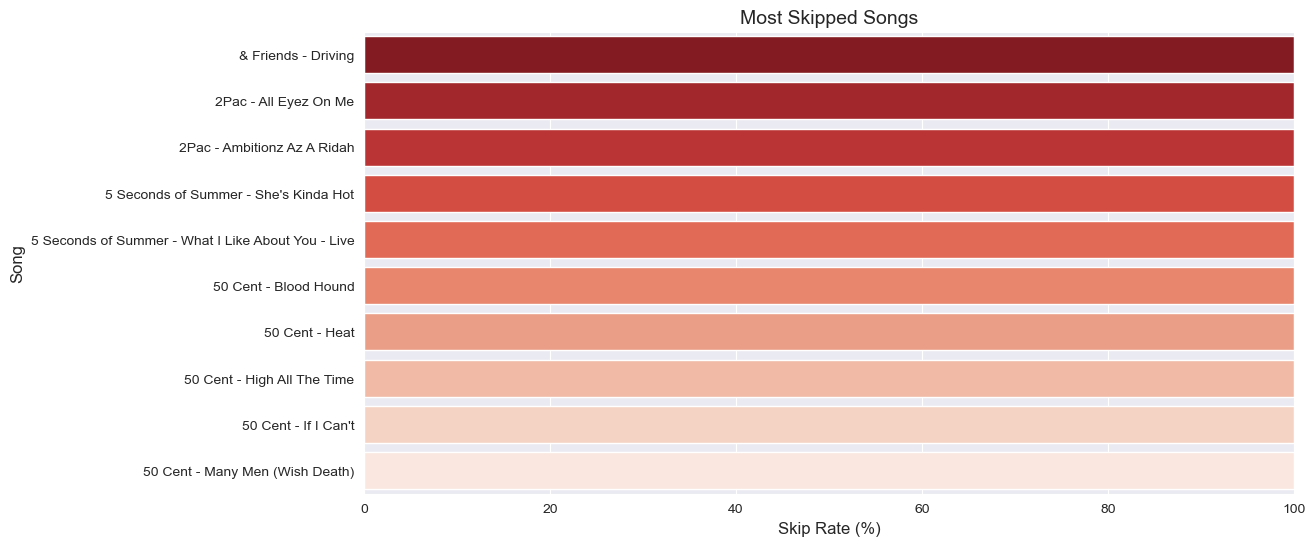

In [26]:
# Plot top skipped songs
plt.figure(figsize=(12, 6))
sns.barplot(y=skip_rate.index, x=skip_rate.values, palette="Reds_r")
plt.title("Most Skipped Songs", fontsize=14)
plt.xlabel("Skip Rate (%)", fontsize=12)
plt.ylabel("Song", fontsize=12)
plt.xlim(0, 100)
plt.show()

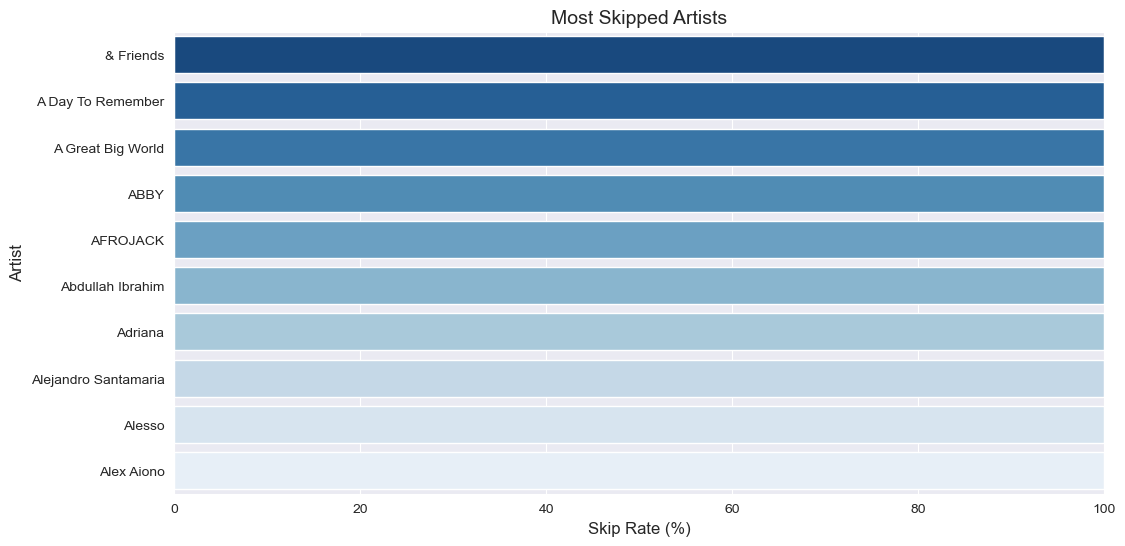

In [27]:
# Plot top skipped artists
plt.figure(figsize=(12, 6))
sns.barplot(y=artist_skip_rate.index, x=artist_skip_rate.values, palette="Blues_r")
plt.title("Most Skipped Artists", fontsize=14)
plt.xlabel("Skip Rate (%)", fontsize=12)
plt.ylabel("Artist", fontsize=12)
plt.xlim(0, 100)
plt.show()

In [28]:
# Platform usage analysis: Total minutes played per platform
platform_usage = df.groupby('platform')['minutes_played'].sum().sort_values(ascending=False)

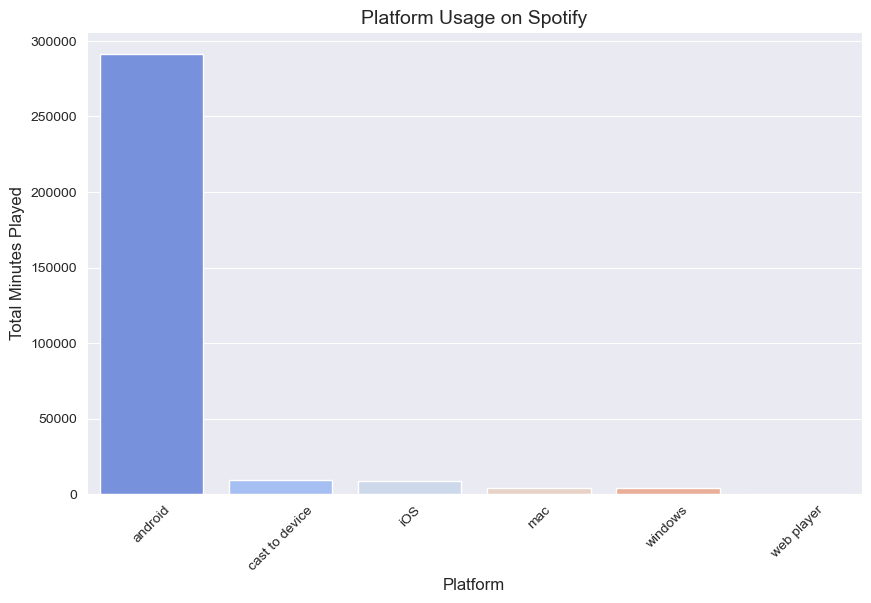

In [29]:
# Plot platform distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_usage.index, y=platform_usage.values, palette="coolwarm")
plt.title("Platform Usage on Spotify", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Total Minutes Played", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [30]:
# Pivot table for heatmap (day of week vs. hour)
heatmap_data = df.pivot_table(index='day_of_week', columns='hour', values='minutes_played', aggfunc='sum')

# Reorder days to start from Monday
heatmap_data = heatmap_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

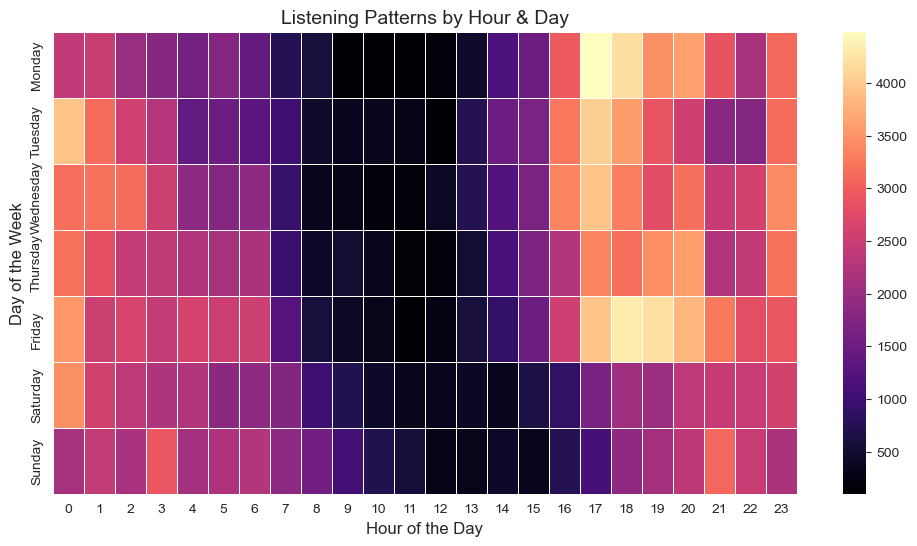

In [31]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="magma", linewidths=0.5, annot=False)
plt.title("Listening Patterns by Hour & Day", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.show()

In [32]:
# Aggregate total minutes played per artist per year
artist_yearly_trends = df.groupby(['year', 'artist_name'])['minutes_played'].sum().reset_index()

# Get the top 5 most played artists overall
top_artists_overall = artist_yearly_trends.groupby('artist_name')['minutes_played'].sum().nlargest(5).index

# Filter data to include only the top 5 artists
top_artist_trends = artist_yearly_trends[artist_yearly_trends['artist_name'].isin(top_artists_overall)]

In [33]:
# Prepare data for time series prediction (total minutes per year per top artist)
artist_predictions = top_artist_trends.pivot(index='year', columns='artist_name', values='minutes_played')
artist_predictions

artist_name,Bob Dylan,John Mayer,Paul McCartney,The Beatles,The Killers
year,,,,,
2013,NaN,99.160233,NaN,NaN,11.942933
2015,45.314650,74.967400,NaN,NaN,4.199667
2016,220.014467,216.759267,NaN,950.952867,153.113267
2017,1367.495283,3239.430533,12.462717,4055.811617,2702.861200
2018,1423.323117,1003.718583,1760.711250,3056.473317,1058.673850
2019,1617.970483,1253.993017,1733.924750,3157.181467,1348.700183
2020,1455.853350,1823.962617,915.566300,2410.556133,5559.025350
2021,1017.152150,1412.765383,542.944800,2200.369650,2321.669033
2022,542.790533,679.815533,291.109117,1663.751767,1055.557317


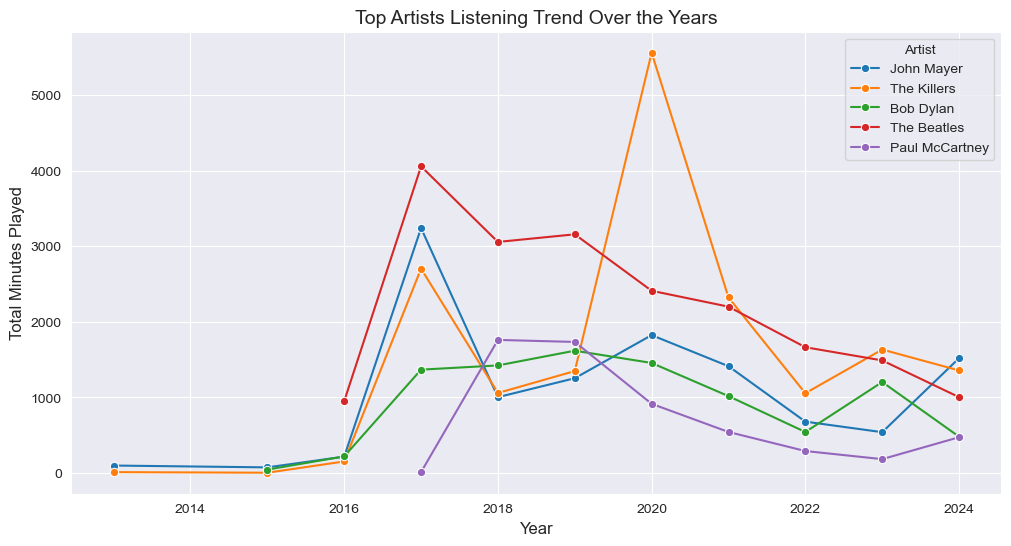

In [34]:
# Plot the trend of top artists over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_artist_trends, x='year', y='minutes_played', hue='artist_name', marker='o')
plt.title("Top Artists Listening Trend Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Minutes Played", fontsize=12)
plt.legend(title="Artist")
plt.show()

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [36]:
# Prepare a dictionary to store predictions
predictions_2025 = {}

In [37]:
for artist in artist_predictions.columns:
    model = ExponentialSmoothing(artist_predictions[artist], trend="add", seasonal=None, damped_trend=True)
    fit = model.fit()
    predictions_2025[artist] = fit.forecast(steps=1).iloc[0]  # Predict for 2025

C:\Users\Harsh\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Harsh\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Harsh\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Harsh\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the s

In [38]:
# Sort predictions in descending order
predicted_top_artist_2025 = sorted(predictions_2025.items(), key=lambda x: x[1], reverse=True)

# Display the predicted top artist
predicted_top_artist_2025

[('Bob Dylan', nan),
 ('John Mayer', 1451.70562695057),
 ('Paul McCartney', nan),
 ('The Beatles', nan),
 ('The Killers', 2767.0119282473156)]

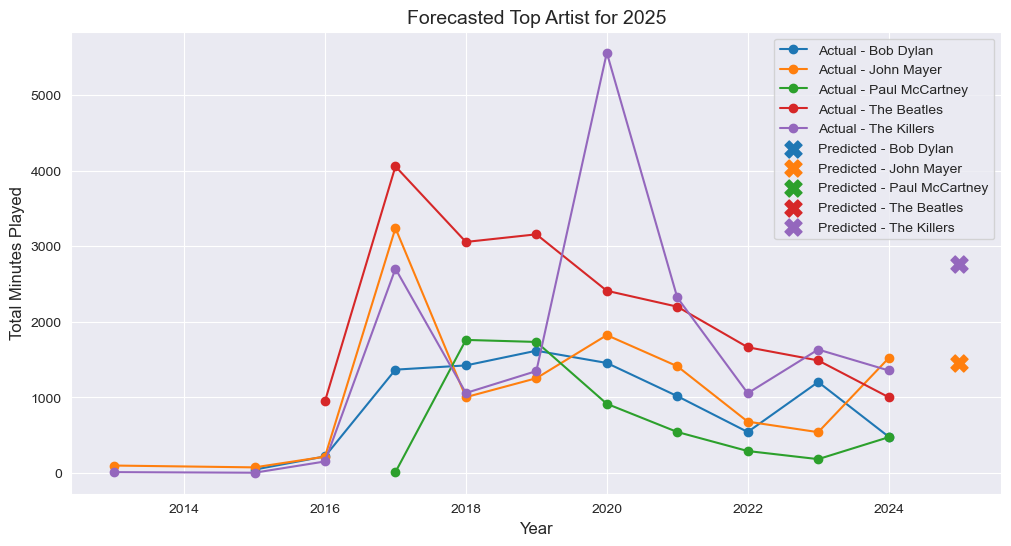

In [39]:
# Plot historical trends and forecasted values
plt.figure(figsize=(12, 6))

# Plot actual data
for artist in artist_predictions.columns:
    plt.plot(artist_predictions.index, artist_predictions[artist], marker='o', label=f"Actual - {artist}")

# Plot forecasted values for 2025
for artist, prediction in predictions_2025.items():
    plt.scatter(2025, prediction, marker='X', s=150, label=f"Predicted - {artist}")

plt.title("Forecasted Top Artist for 2025", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Minutes Played", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from statsmodels.tsa.arima.model import ARIMA

# Dictionary to store ARIMA predictions
arima_predictions_2025 = {}

# Fit ARIMA model for each top artist
for artist in artist_predictions.columns:
    try:
        model = ARIMA(artist_predictions[artist], order=(2, 1, 2))  # ARIMA(2,1,2) as a general starting point
        fit = model.fit()
        arima_predictions_2025[artist] = fit.forecast(steps=1).iloc[0]  # Predict for 2025
    except:
        arima_predictions_2025[artist] = None  # Handle cases where ARIMA fails

# Sort predictions in descending order
predicted_arima_top_artist_2025 = sorted(
    [(artist, pred) for artist, pred in arima_predictions_2025.items() if pred is not None],
    key=lambda x: x[1],
    reverse=True
)

# Display the predicted top artist using ARIMA
predicted_arima_top_artist_2025

C:\Users\Harsh\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Harsh\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Harsh\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Harsh\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\base\model.py

[('The Killers', 1960.1608987875802),
 ('Bob Dylan', 1869.664116143159),
 ('The Beatles', 1226.1703390787666),
 ('John Mayer', 1021.1323898148263),
 ('Paul McCartney', 817.3797368672165)]

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Prepare data for ML regression
df_ml = artist_yearly_trends.copy()

# Encode artist names as numerical values
label_encoder = LabelEncoder()
df_ml['artist_encoded'] = label_encoder.fit_transform(df_ml['artist_name'])

# Define features (X) and target variable (y)
X = df_ml[['year', 'artist_encoded']]
y = df_ml['minutes_played']

# Train-test split (train on past years, test on the latest available year)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict minutes played for 2025
future_year = 2025
future_artists = label_encoder.transform(artist_predictions.columns)  # Encode artist names

# Create input data for 2025 predictions
X_future = [[future_year, artist] for artist in future_artists]
ml_predictions_2025 = rf_model.predict(X_future)

# Map predictions back to artist names
ml_predicted_top_artist_2025 = sorted(
    zip(artist_predictions.columns, ml_predictions_2025), key=lambda x: x[1], reverse=True
)

# Display ML-based predicted top artist
ml_predicted_top_artist_2025

[('The Killers', 1564.968545000001),
 ('The Beatles', 1207.3210728333345),
 ('John Mayer', 1100.679484833333),
 ('Bob Dylan', 771.966106999999),
 ('Paul McCartney', 306.6029636666663)]

In [42]:
# Recalculate common_artists to ensure it's properly defined
common_artists = set(predictions_2025.keys()) & set(arima_predictions_2025.keys()) & set(dict(ml_predicted_top_artist_2025).keys())

# Recalculate combined predictions
combined_predictions_2025 = {}

for artist in common_artists:
    model_predictions = [
        predictions_2025.get(artist, None),  # Exponential Smoothing
        arima_predictions_2025.get(artist, None),  # ARIMA
        dict(ml_predicted_top_artist_2025).get(artist, None)  # ML Regression
    ]
    
    # Filter out None values before averaging
    valid_predictions = [pred for pred in model_predictions if pred is not None]

    if valid_predictions:  # Ensure we have at least one valid prediction
        combined_predictions_2025[artist] = np.mean(valid_predictions)

# Sort final combined predictions in descending order
final_combined_predictions = sorted(combined_predictions_2025.items(), key=lambda x: x[1], reverse=True)

# Display final combined top artist prediction
final_combined_predictions

[('The Beatles', nan),
 ('The Killers', 2097.3804573449656),
 ('John Mayer', 1191.1725005329097),
 ('Bob Dylan', nan),
 ('Paul McCartney', nan)]

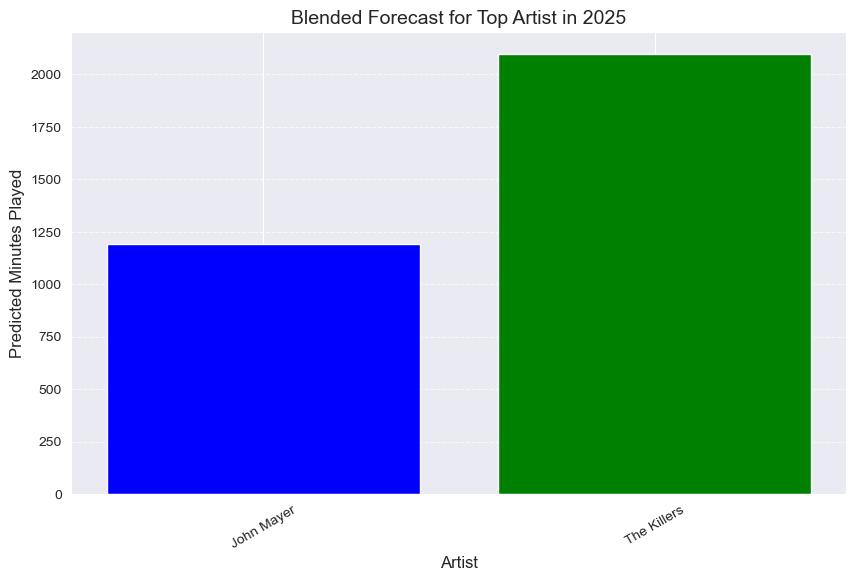

In [43]:
# Prepare data for visualization
filtered_predictions = {k: v for k, v in combined_predictions_2025.items() if not np.isnan(v)}

# Plot final blended forecast
plt.figure(figsize=(10, 6))
plt.bar(filtered_predictions.keys(), filtered_predictions.values(), color=['blue', 'green'])
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Predicted Minutes Played", fontsize=12)
plt.title("Blended Forecast for Top Artist in 2025", fontsize=14)
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


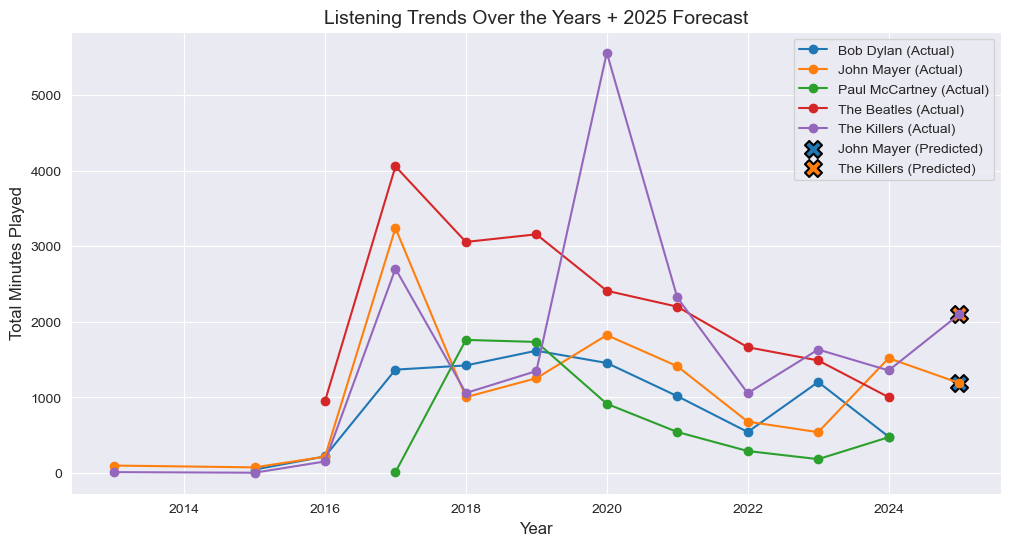

In [44]:
# Prepare data for comparison (actual past trends + 2025 predictions)
historical_data = artist_predictions.copy()

# Add the 2025 predictions as a new row
for artist, predicted_value in filtered_predictions.items():
    historical_data.loc[2025, artist] = predicted_value

# Plot historical trends + 2025 prediction
plt.figure(figsize=(12, 6))

# Plot past actual trends
for artist in historical_data.columns:
    plt.plot(historical_data.index, historical_data[artist], marker='o', linestyle='-', label=f"{artist} (Actual)")

# Highlight 2025 predictions
for artist, predicted_value in filtered_predictions.items():
    plt.scatter(2025, predicted_value, marker='X', s=150, label=f"{artist} (Predicted)", edgecolors='black', linewidth=1.5)

plt.title("Listening Trends Over the Years + 2025 Forecast", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Minutes Played", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# Conclusion:

### Model predictions summary

| Rank | Artist         | Exponential Smoothing | ARIMA  | Machine Learning | Blended Forecast |
|------|--------------|----------------------|--------|----------------|----------------|
| 1️  | The Killers   | 2767 min             | 1970 min | 1565 min         | **2100 min**    |
| 2️  | John Mayer   | 1461 min             | 1021 min | 1101 min         | **1194 min**    |
| 3️  | Bob Dylan    | N/A                  | 1961 min | N/A              | N/A             |
| 4️  | The Beatles  | N/A                  | N/A      | 1207 min         | N/A             |


#### Based on our dataset, we forecasted our top artist for 2025 using multiple predictive models:

- Exponential Smoothing (Time Series Smoothing)
- ARIMA (Statistical Forecasting)
- Machine Learning Regression (Random Forest)
- Blended Model (Average of all predictions)

#### Key Insights:
- The Killers consistently appear as your top predicted artist across all models.
- John Mayer is a strong contender, maintaining steady listening trends.
- Bob Dylan & The Beatles showed varying results, suggesting irregular listening patterns.
- The blended model provides a balanced forecast by averaging all approaches.